# 1 线性回归之正规方程

特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
均方误差 (MSE): 0.5559

模型回归系数:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337
截距: -37.0233


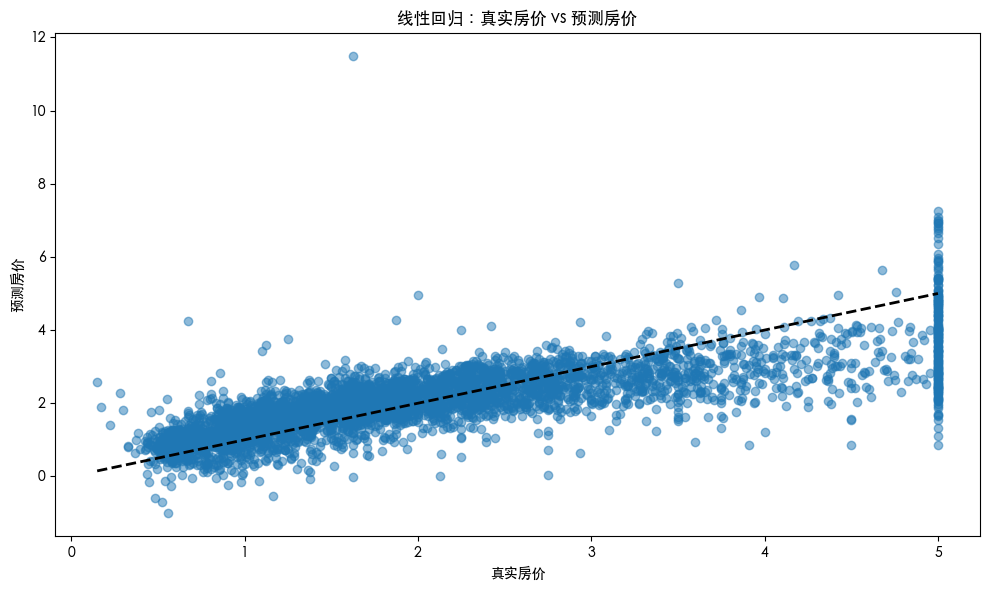

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.font_manager as font_manager

font_path = ('/System/Library/Fonts/STHeiti Light.ttc')
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target
# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()

print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")


# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")

# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])
# 创建线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train, y_train)

# 预测
y_pred = lr_model.predict(X_test)

# 评估模型,均方误差
mse = mean_squared_error(y_test, y_pred)


print(f"均方误差 (MSE): {mse:.4f}")


# 查看模型回归系数
print("\n模型回归系数:")
for name, coef in zip(housing.feature_names, lr_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {lr_model.intercept_:.4f}")

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('线性回归：真实房价 vs 预测房价')
plt.tight_layout()

plt.show()


特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
均方误差 (MSE): 0.5559

模型回归系数:
MedInc: 0.8544
HouseAge: 0.1225
AveRooms: -0.2944
AveBedrms: 0.3393
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8969
Longitude: -0.8698
截距: 2.0719

模型和标准化器已保存


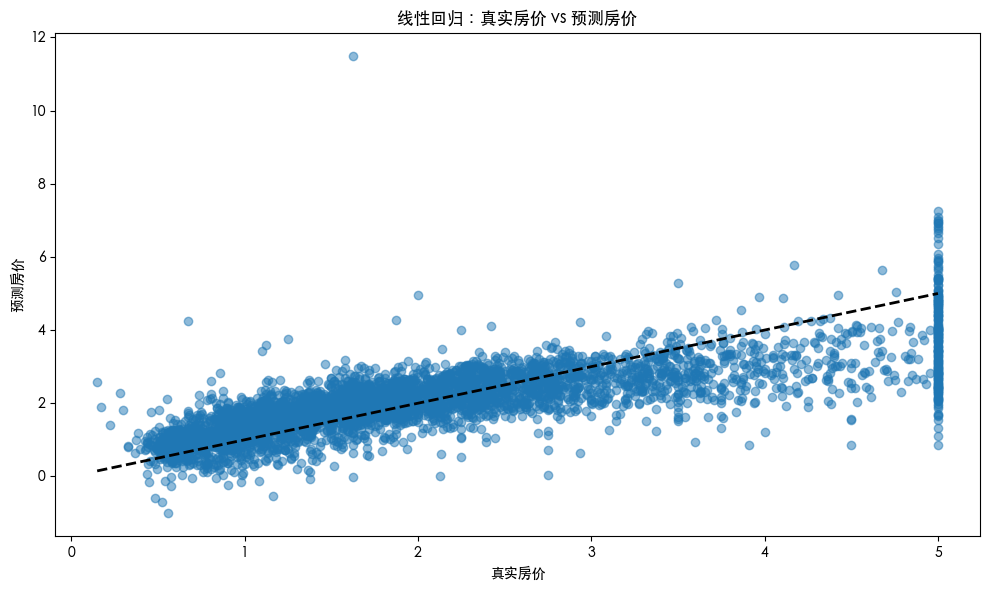

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target
# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()
print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")


# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")

# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])

# 对特征进行标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train_scaled, y_train)

# 预测
y_pred = lr_model.predict(X_test_scaled)

# 评估模型,均方误差
mse = mean_squared_error(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")

# 查看模型回归系数
print("\n模型回归系数:")
for name, coef in zip(housing.feature_names, lr_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {lr_model.intercept_:.4f}")

# 保存模型和标准化器
""" joblib.dump(value, filename, compress=0)
	•	value: The Python object you want to save (e.g., a trained model, array, dictionary).
	•	filename: The file path or name where the object will be stored.
	•	compress (optional): If set to an integer (1 to 9), it compresses the file. Higher numbers mean more compression but slower saving.
"""
	
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n模型和标准化器已保存")

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('线性回归：真实房价 vs 预测房价')
plt.tight_layout()
plt.show()


## 加载模型并预测

In [5]:
import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.font_manager as font_manager
font_path = '/System/Library/Fonts/STHeiti Light.ttc'
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False


# 加载保存的模型和标准化器
loaded_scaler = joblib.load('scaler.pkl')
loaded_model = joblib.load('linear_regression_model.pkl')
print("模型和标准化器已加载")

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
new_house_data=X_test[[-1],:]

# 对新数据进行标准化
new_house_data_scaled = loaded_scaler.transform(new_house_data)

# 使用加载的模型进行预测
predicted_price = loaded_model.predict(new_house_data_scaled)

print(f"预测的房价: {predicted_price[0]:.2f}")
print('-'*100)
# 对整个测试集进行预测
X_test_scaled = loaded_scaler.transform(X_test)
y_pred = loaded_model.predict(X_test_scaled)

# 评估模型性能
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 计算均方误差(MSE)
mse = mean_squared_error(y_test, y_pred)


print("\n模型评估指标:")
print(f"均方误差 (MSE): {mse:.4f}")




模型和标准化器已加载
预测的房价: 2.01
----------------------------------------------------------------------------------------------------

模型评估指标:
均方误差 (MSE): 0.5559


# 线性回归之梯度下降

### 形象理解梯度下降

第1次迭代，x=1.4000,f(x)=10.6800
第2次迭代，x=0.3600,f(x)=3.1088
第3次迭代，x=-0.0560,f(x)=1.8974
第4次迭代，x=-0.2224,f(x)=1.7036
第5次迭代，x=-0.2890,f(x)=1.6726
第6次迭代，x=-0.3156,f(x)=1.6676
第7次迭代，x=-0.3262,f(x)=1.6668
第8次迭代，x=-0.3305,f(x)=1.6667
第9次迭代，x=-0.3322,f(x)=1.6667
第10次迭代，x=-0.3329,f(x)=1.6667
第11次迭代，x=-0.3332,f(x)=1.6667
第12次迭代，x=-0.3333,f(x)=1.6667
第13次迭代，x=-0.3333,f(x)=1.6667
第14次迭代，x=-0.3333,f(x)=1.6667
第15次迭代，x=-0.3333,f(x)=1.6667
第16次迭代，x=-0.3333,f(x)=1.6667
第17次迭代，x=-0.3333,f(x)=1.6667
第18次迭代，x=-0.3333,f(x)=1.6667
第19次迭代，x=-0.3333,f(x)=1.6667
第20次迭代，x=-0.3333,f(x)=1.6667


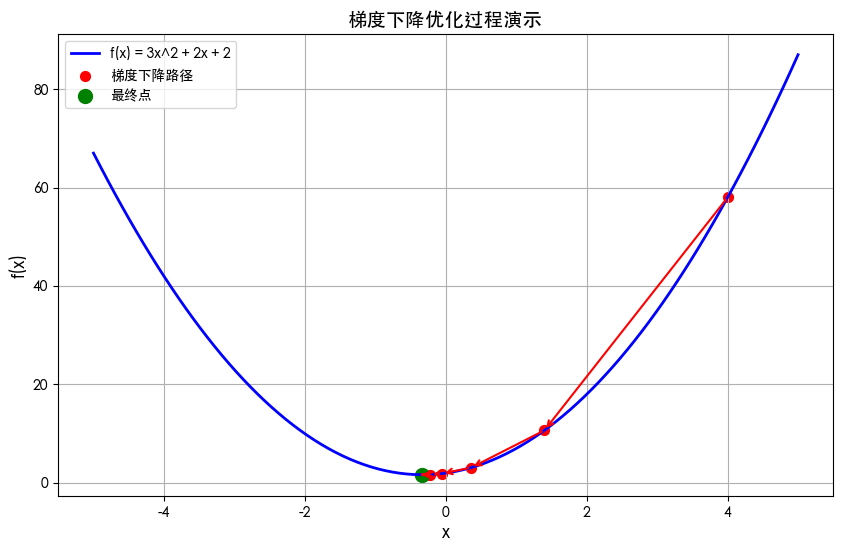

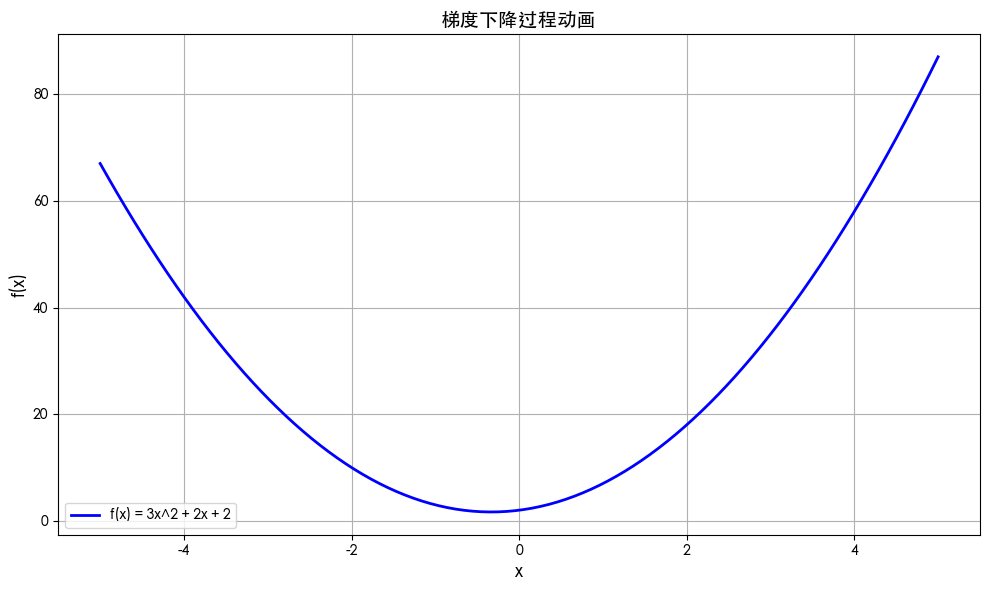

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 创建一个简单的一元二次函数 f(x) = 3x^2 + 2x + 2
def f(x):
    return 3*x**2 + 2*x + 2

# 计算导数 f'(x) = 6x + 2
def df(x):
    return 6*x + 2

# 设置图形大小
plt.figure(figsize=(10, 6))


# 生成x值和对应的y值
#linspace: Return evenly spaced numbers over a specified interval.  Returns `num` evenly spaced samples, calculated over the interval [`start`, `stop`].  The endpoint of the interval can optionally be excluded.
x = np.linspace(-5, 5, 100) # 生成100个点，从-5到5
y = f(x)

# 绘制函数曲线
#'b-' means blue color with solid line style
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = 3x^2 + 2x + 2')

# 梯度下降参数
learning_rate = 0.1  # 学习率
max_iterations = 20  # 最大迭代次数
x_start = 4.0        # 起始点

# 存储梯度下降过程中的点
# create an empty list to store the points
x_history = [x_start]
y_history = [f(x_start)]

# 执行梯度下降
current_x = x_start
#iterate for a maximum of max_iterations
for i in range(max_iterations):
    gradient = df(current_x) # 计算梯度
    new_x = current_x - learning_rate * gradient
    
    # 存储每一步的位置，为了画散点图
    x_history.append(new_x)
    print(f'第{i+1}次迭代，x={new_x:.4f},f(x)={f(new_x):.4f}')
    y_history.append(f(new_x))
    
    current_x = new_x
    
    # 如果梯度接近0，提前结束
    # stop if the gradient is very small, since we are approaching the minimum
    if abs(gradient) < 1e-6:
        break

# 绘制梯度下降路径
plt.scatter(x_history, y_history, c='r', s=50, label='梯度下降路径')
for i in range(len(x_history)-1):
    plt.annotate('', xy=(x_history[i+1], y_history[i+1]),  #xy is  the ending point of the arrow.
                 xytext=(x_history[i], y_history[i]), #xytext is the starting point of the arrow.
                 arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 1.5}) # arrowstyle: arrow style, color: arrow color, lw: arrow line width
    
# 标记最终点
# s means size of the point
plt.scatter(x_history[-1], y_history[-1], c='g', s=100, label='最终点')


# 添加图例和标签
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('梯度下降优化过程演示', fontsize=14)
plt.legend()
plt.grid(True)

# 创建动画展示梯度下降过程
#subplots : Create a figure and a set of subplots.
#	•	fig: the Figure object (the entire canvas)
#	•	ax: the Axes object (a single plot area inside the figure)
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制函数曲线
ax.plot(x, y, 'b-', linewidth=2, label='f(x) = 3x^2 + 2x + 2')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('梯度下降过程动画', fontsize=14)
ax.grid(True)

# 初始点
point, = ax.plot([], [], 'ro', markersize=10)
text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

# 初始化函数
def init():
    point.set_data([], [])
    text.set_text('')
    return point, text

# 动画更新函数
def update(frame):
    point.set_data(x_history[frame], y_history[frame])
    text.set_text(f'迭代: {frame}\nx = {x_history[frame]:.4f}\nf(x) = {y_history[frame]:.4f}')
    return point, text

# 创建动画
ani = FuncAnimation(fig, update, frames=len(x_history),
                    init_func=init, blit=True, interval=500)

plt.legend()
plt.tight_layout()
plt.show()


### 实战线性回归之梯度下降

特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
均方误差 (MSE): 0.5506

模型回归系数:
MedInc: 0.8126
HouseAge: 0.1148
AveRooms: -0.2503
AveBedrms: 0.3024
Population: 0.0023
AveOccup: -0.1365
Latitude: -0.9093
Longitude: -0.8906
截距: 2.0573

模型和标准化器已保存


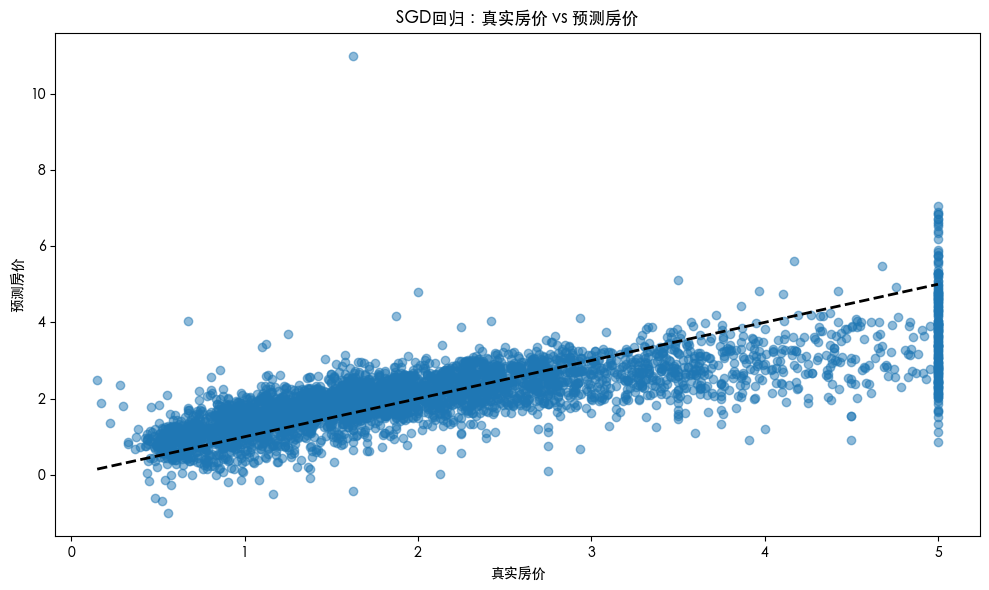

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target
# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()
print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")


# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")

# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])

# 对特征进行标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建SGD回归模型，tol是停止条件，当相邻两次迭代的目标函数值（如损失函数）差值 ≤ tol 时，算法停止
#invscaling代表学习率随迭代次数衰减，eta0是初始学习率;The initial learning rate
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, eta0=0.01)

# 训练模型
#fit: Fit linear model with Stochastic Gradient Descent.
sgd_model.fit(X_train_scaled, y_train)

# 训练完后，预测新的测试集
y_pred = sgd_model.predict(X_test_scaled)

# 评估模型,均方误差； 对比y_test和y_pred的两者误差mean_squared_error acutally means error,square, then mean.
mse = mean_squared_error(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")

# 查看模型回归系数
print("\n模型回归系数:")
for name, coef in zip(housing.feature_names, sgd_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {sgd_model.intercept_[0]:.4f}")

# 保存模型和标准化器
joblib.dump(sgd_model, 'sgd_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n模型和标准化器已保存")

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
#alpha=0.5 adds transparency to the points, so overlapping dots are easier to see.
plt.scatter(y_test, y_pred, alpha=0.5)
"""
	•	Draws the ideal prediction line (the diagonal line where y_pred = y_test).
	•	[y.min(), y.max()] on both x and y means the line goes from the bottom-left to top-right.
	•	'k--':
	•	'k' = black color,
	•	'--' = dashed line style.
	•	lw=2: line width = 2 (makes the line thicker and easier to see)
This is the reference line — perfect predictions would lie exactly on this line.
"""
# [y.min(), y.max()], [y.min(), y.max()] the first group of numbers is the x-axis range(first number is the minimum x-value, second number is the maximum x-value), and the second group is the y-axis range.
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('SGD回归：真实房价 vs 预测房价')
#tight_layout(): Automatically adjusts spacing between subplots, labels, and title so that nothing overlaps.
plt.tight_layout()
plt.show()


# 实战Lasso回归，岭回归

Lasso回归
均方误差 (MSE): 0.5483

Lasso回归系数:
MedInc: 0.8010
HouseAge: 0.1271
AveRooms: -0.1628
AveBedrms: 0.2062
Population: -0.0000
AveOccup: -0.0306
Latitude: -0.7901
Longitude: -0.7557
截距: 2.0719


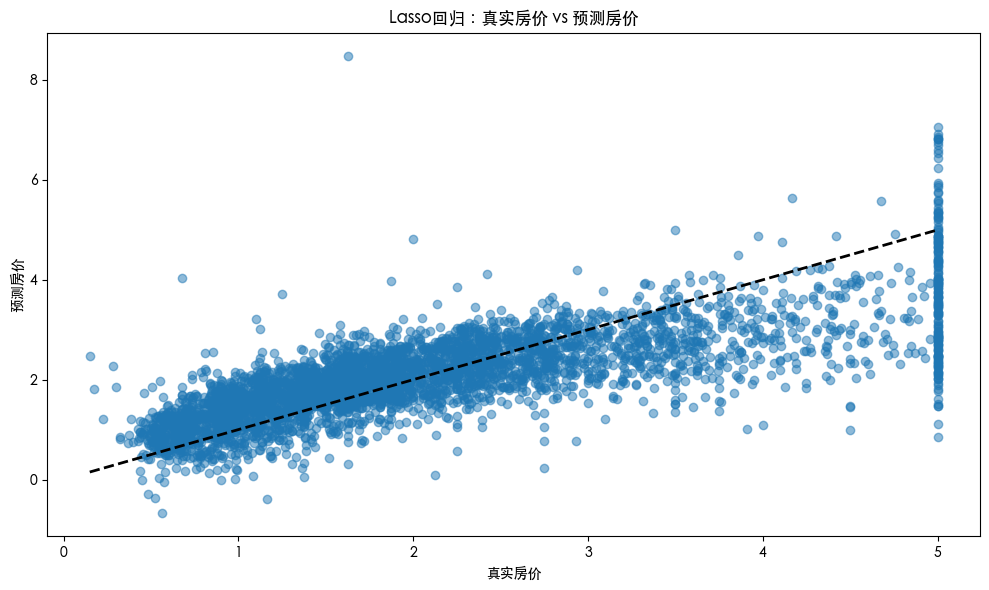


岭回归
均方误差 (MSE): 0.5559

岭回归系数:
MedInc: 0.8543
HouseAge: 0.1226
AveRooms: -0.2942
AveBedrms: 0.3390
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8962
Longitude: -0.8691
截距: 2.0719


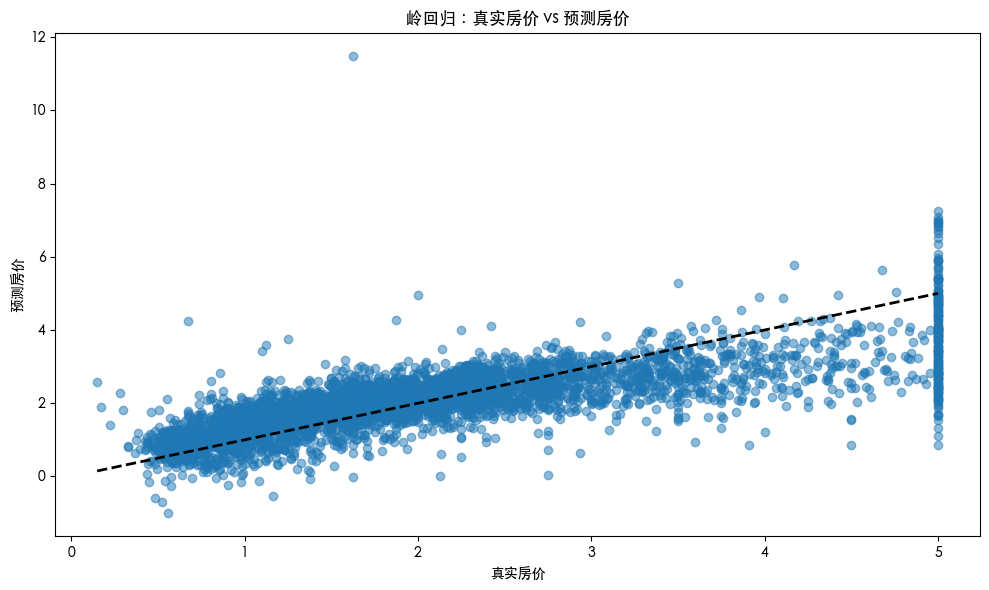

In [8]:
# 1. 导入必要的库
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# 2. 使用Lasso回归
print("="*50)
print("Lasso回归")
print("="*50)

# 创建Lasso回归模型
"""
Alpha(penalty term):Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float i. e. in [0, inf).When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Instead, you should use the LinearRegression object.

max_iter: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.
"""
lasso_model = Lasso(alpha=0.01, random_state=42, max_iter=10000)

# 训练模型
# train the model with the scaled training data
# fit():Fit model with coordinate descent. 
lasso_model.fit(X_train_scaled, y_train)

# 预测
# Predict using the linear model.
lasso_pred = lasso_model.predict(X_test_scaled)

# 评估模型
# evaluate the model on the test set using mean squared error (MSE)
lasso_mse = mean_squared_error(y_test, lasso_pred)


print(f"均方误差 (MSE): {lasso_mse:.4f}")

# 查看模型回归系数
print("\nLasso回归系数:")
# coef_ – Parameter vector (w,weight in the cost function formula).
# we can see a certain feature's weight(coefficient) is zero using lasso regression
for name, coef in zip(housing.feature_names, lasso_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {lasso_model.intercept_:.4f}")

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))

plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('Lasso回归：真实房价 vs 预测房价')
plt.tight_layout()
plt.show()

# 3. 使用岭回归
print("\n"+"="*50)
print("岭回归")
print("="*50)

# 创建岭回归模型
# Ridge: Linear least squares with l2 regularization
# alpha, penalty term, regularization strength. alpha must be a non-negative float.
ridge_model = Ridge(alpha=1.0, random_state=42)

# 训练模型
ridge_model.fit(X_train_scaled, y_train)

# 预测
ridge_pred = ridge_model.predict(X_test_scaled)

# 评估模型
ridge_mse = mean_squared_error(y_test, ridge_pred)


print(f"均方误差 (MSE): {ridge_mse:.4f}")

# 查看模型回归系数
print("\n岭回归系数:")
for name, coef in zip(housing.feature_names, ridge_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {ridge_model.intercept_:.4f}") # 截距是当所有特征都为0时，预测值为多少

# we can see a certain feature's weight(coefficient) is almost but not exactly zero using ridge regression
# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('岭回归：真实房价 vs 预测房价')
plt.tight_layout()
plt.show()




# 逻辑回归

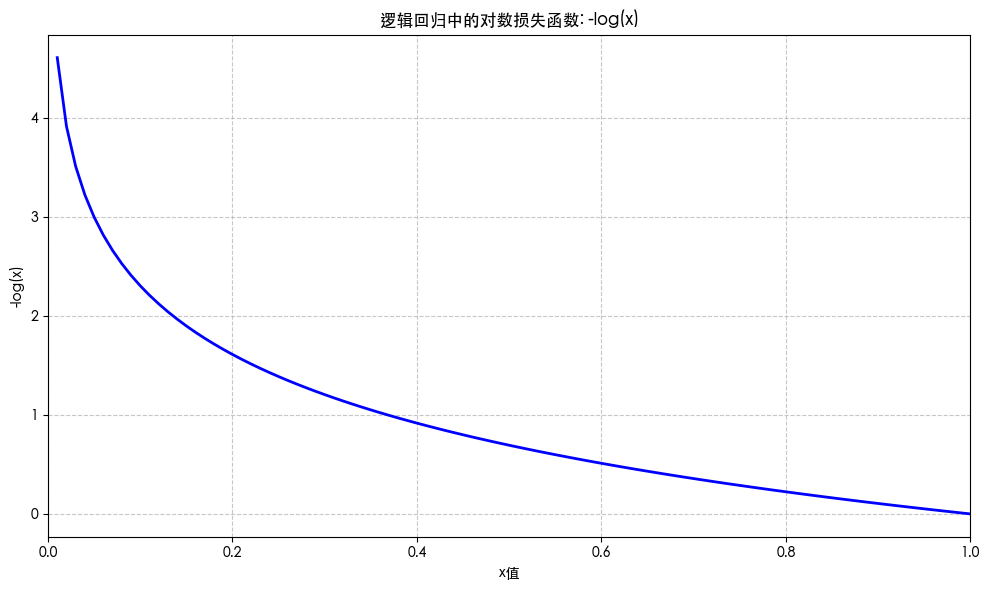

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 创建0到1之间的x值
""""
Return evenly spaced numbers over a specified interval.  Returns `num` evenly spaced samples, calculated over the interval [`start`, `stop`].  from 0.01 to 1., with 100 values evenly spaced.
"""
x = np.linspace(0.01, 1, 100)  # 从0.01开始避免在x=0处的无穷大

# 计算-np.log(x)
y = -np.log(x)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('x值')
plt.ylabel('-log(x)')
plt.title('逻辑回归中的对数损失函数: -log(x)')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


/var/folders/nt/z2_pm9xj1bl1zz8q88mshrpc0000gn/T/ipykernel_2841/2659290931.py:8: RuntimeWarning: divide by zero encountered in log
  y = -np.log(1-x)


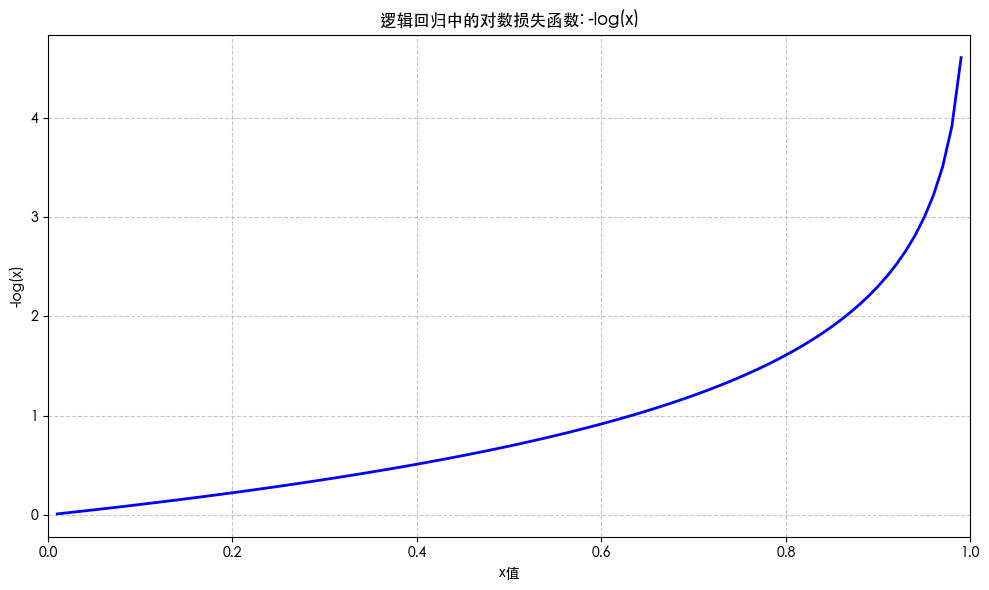

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 创建0到1之间的x值
x = np.linspace(0.01, 1, 100)  # 从0.01开始避免在x=0处的无穷大

# 计算-np.log(1-x)  rather than -np.log(x)
y = -np.log(1-x)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('x值')
plt.ylabel('-log(x)')
plt.title('逻辑回归中的对数损失函数: -log(x)')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np

# 读取数据文件
df = pd.read_csv('data/breast-cancer-wisconsin.csv', header=None)

# 检查数据中是否有空值
# 首先检查是否有'?'值，因为在查看上下文中发现数据里有'?'表示缺失值
# print("数据中是否包含'?'值:", df == '?')

# 将'?'替换为NaN，以便使用pandas的空值检测函数
df = df.replace('?', np.nan)


# 显示每列缺失值的数量
print("\n每列缺失值数量:")
# df.isna().sum() returns the number of NaN (missing) values in each column of a DataFrame
# sum():Return the sum of the values over the requested axis.axis{index (0), columns (1)}, Axis for the function to be applied on. For Series this parameter is unused and defaults to 0.
print(df.isna().sum())

# 显示数据的基本信息
print("\n数据基本信息:")
print(df.info())
# 删除包含缺失值的行
df_clean = df.dropna()

print(f"\n删除缺失值后的数据形状: {df_clean.shape}")

# 重命名列以便更容易理解
columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
           'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
           'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
# dataframe.columns = new_columns, which leads to return a dataframe with the new column names.
df_clean.columns = columns

# 查看数据的基本统计信息
print("\n数据的基本统计信息:")
print(df_clean.describe())

# 将目标变量转换为二分类问题（2为良性，4为恶性）
# 将4转换为1（恶性），2转换为0（良性）
# df_clean.loc[:, 'Class'] = df_clean.loc[:, 'Class'].map({2: 0, 4: 1})
print("\n类别分布:")
# series.value_counts() returns a Series containing counts of unique values in the series.
print(df_clean['Class'].value_counts())

# 准备特征和目标变量
# notice the class only have two classes, 2 and 4 (rather than 0 and 1)
X = df_clean.drop(['ID', 'Class'], axis=1)  # 删除ID列和目标变量
y = df_clean['Class']

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
#random_state:Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary  .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

# 使用逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# 创建逻辑回归模型
# 使用较小的C值增加正则化强度，并使用L2正则化
# C – Inverse of regularization strength; must be a positive float. smaller values specify stronger regularization.
# inverse means one becomes larger the other becomes smaller.
# liblinear solver is a good default solver for small datasets.
model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
#predict():returns the predicted class labels for samples in X.
#predict_proba():returns the probability of the sample for each class in the model. so the largest value is the predicted class.
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# 评估模型
print("\n模型评估:")
print(f"准确率: {accuracy_score(y_test, y_pred):.4f}")

print(y_pred[0:5])
# notice the class only have two classes, 2 and 4 (rather than 0 and 1 due to given labels)
y_pred_prob



每列缺失值数量:
0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       683 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None

删除缺失值后的数据形状: (683, 11)

数据的基本统计信息:
                 ID  Clump Thickness  Uniformity of Cell Size  \
count  6.830000e+02       683.000000               683.000000   
mean   1.076720e+06         4.442167                 3.150805   
std    6

array([[4.50691460e-02, 9.54930854e-01],
       [6.56516750e-02, 9.34348325e-01],
       [9.25797276e-01, 7.42027239e-02],
       [8.91911972e-01, 1.08088028e-01],
       [8.81855004e-01, 1.18144996e-01],
       [9.23209255e-01, 7.67907452e-02],
       [8.11848390e-01, 1.88151610e-01],
       [8.31395499e-01, 1.68604501e-01],
       [1.84935198e-01, 8.15064802e-01],
       [9.15962267e-01, 8.40377327e-02],
       [8.97656556e-01, 1.02343444e-01],
       [9.10942305e-01, 8.90576952e-02],
       [9.24207590e-01, 7.57924104e-02],
       [9.54738816e-01, 4.52611841e-02],
       [6.56395333e-01, 3.43604667e-01],
       [1.82918827e-02, 9.81708117e-01],
       [9.44743870e-01, 5.52561296e-02],
       [1.81208200e-03, 9.98187918e-01],
       [8.04007941e-01, 1.95992059e-01],
       [7.06531834e-02, 9.29346817e-01],
       [7.47816942e-03, 9.92521831e-01],
       [8.68134907e-01, 1.31865093e-01],
       [3.30555303e-03, 9.96694447e-01],
       [9.25797276e-01, 7.42027239e-02],
       [8.029234